# Assignment 4

In [12]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
from collections import Counter
import matplotlib.pyplot as plt

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [26]:
G1 = pickle.load(open("assets/A4_P1_G1", mode = "rb"))
G2 = pickle.load(open("assets/A4_P1_G2", mode = "rb"))
G3 = pickle.load(open("assets/A4_P1_G3", mode = "rb"))
G4 = pickle.load(open("assets/A4_P1_G4", mode = "rb"))
G5 = pickle.load(open("assets/A4_P1_G5", mode = "rb"))
P1_Graphs = [G1, G2, G3, G4, G5]

In [52]:
with open("assets/A4_P1_G1", mode = "rb") as file:
    graph = pickle.load(file)

In [56]:
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [59]:
# all have 1000 nodes!

[(graph.number_of_nodes(), graph.number_of_edges()) for graph in P1_Graphs]

[(1000, 999), (1000, 2000), (1000, 2000), (1000, 999), (1000, 2000)]

In [3]:
sorted(nx.preferential_attachment(G1), reverse = True, key = lambda tup: tup[2]);

In [23]:
[nx.average_clustering(graph) for graph in P1_Graphs]

[0.0, 0.49310000000000004, 0.4897333333333334, 0.0, 0.36504285714285717]

In [24]:
[nx.average_shortest_path_length(graph) for graph in P1_Graphs]

[6.530506506506507,
 43.80284684684685,
 39.007695695695695,
 8.158990990990992,
 8.532046046046046]

In [9]:
G1.degree();

In [15]:
def plot_degree_distribution(graph) -> None:
    
    nnodes = graph.number_of_nodes()
    ddist = Counter([degree for (node, degree) in graph.degree()])
    
    fig, axes = plt.subplots(nrows = 1, ncols = 1)
    fig.set_size_inches(5, 5)
    axes.plot(ddist.keys(), ddist.values(), color = "red", marker = "o", linestyle = "None", markeredgecolor = "black")
    axes.set_xlabel("Degrees")
    axes.set_xscale("log")
    axes.set_yscale("log")
    axes.set_ylabel("Fraction of nodes")
    plt.show()

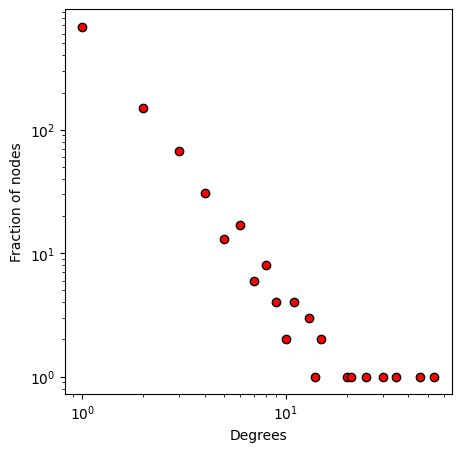

In [16]:
plot_degree_distribution(G1)

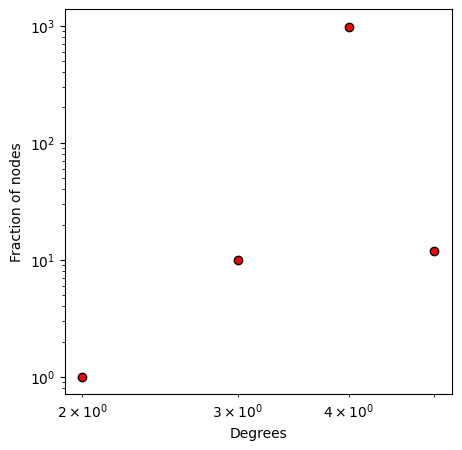

In [17]:
plot_degree_distribution(G2)

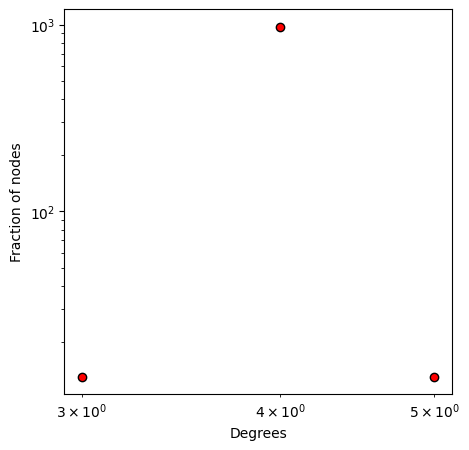

In [18]:
plot_degree_distribution(G3)

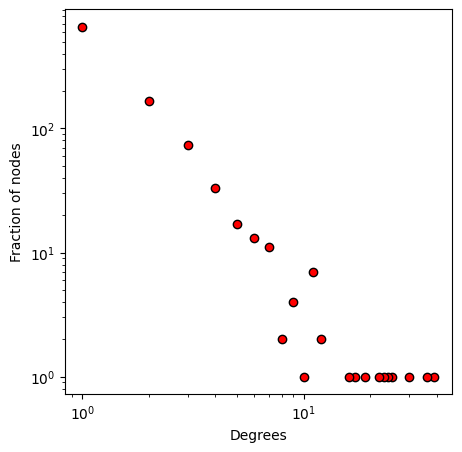

In [19]:
plot_degree_distribution(G4)

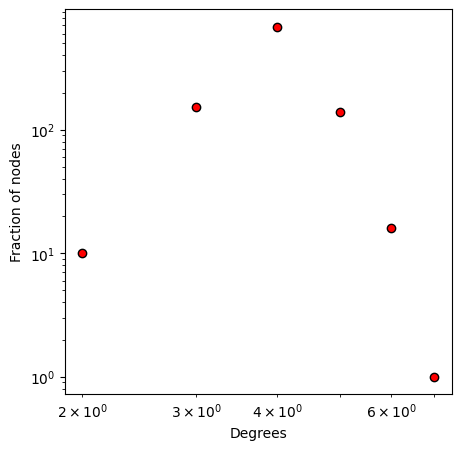

In [20]:
plot_degree_distribution(G5)

In [ ]:
# graphs G1 and G4 show Power law distribution.

In [ ]:
# So, the graphs G2, G3 and G5 must be small world networks.
# With high probability for rewiring, we'd end up with a messy graph with low clustering coefficient (due to the loss of initial structure) 
# and small average shortest path length
# With low probability of rewiring, we'd get a graph with high clustering coefficient but large average shortest path length.

In [28]:
[(nx.average_clustering(graph), nx.average_shortest_path_length(graph)) for graph in P1_Graphs]

[(0.0, 6.530506506506507),
 (0.49310000000000004, 43.80284684684685),
 (0.4897333333333334, 39.007695695695695),
 (0.0, 8.158990990990992),
 (0.36504285714285717, 8.532046046046046)]

In [29]:
# Preferential attachment - nx.barabasi_albert_graph
# Samll World - nx.watts_strogatz_graph

def graph_identification():
    return ["PA", "SW_L", "SW_L", "PA", "SW_H"]

In [30]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"


---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [31]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [37]:
nx.is_directed(G)

False

In [32]:
list(G.nodes(data=True))[:5] # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [59]:
dep = nx.get_node_attributes(G, "Department");
mgmt_salary = nx.get_node_attributes(G, "ManagementSalary");
degrees = dict(nx.degree(G));

In [63]:
# and number of neighbours who receive a management salary

neighbours_with_mgmt_salary = dict.fromkeys(G.nodes(), 0)
node_mgmt_attrs = nx.get_node_attributes(G, "ManagementSalary")

for node in G.nodes():
    for neighbour in nx.neighbors(G, node):
        if node_mgmt_attrs.get(neighbour) == 1:
            neighbours_with_mgmt_salary[node] += 1

In [67]:
# number of neighbours from the same department who also receive a management salary

neighbours_with_mgmt_salary_same_dept = dict.fromkeys(G.nodes(), 0)
node_mgmt_attrs = nx.get_node_attributes(G, "ManagementSalary")
node_dept_attrs = nx.get_node_attributes(G, "Department")

for node in G.nodes():
    for neighbour in nx.neighbors(G, node):
        if (node_mgmt_attrs.get(neighbour) == 1) and (node_dept_attrs.get(node) == node_dept_attrs.get(neighbour)):
            neighbours_with_mgmt_salary_same_dept[node] += 1

In [69]:
neighbours_with_mgmt_salary_same_dept;

In [62]:
pd.DataFrame(dep, mgmt_salary, degrees, neighbours_with_mgmt_salary);

TypeError: object of type 'int' has no len()

In [ ]:
def salary_predictions():
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
ans_salary_preds = salary_predictions()
assert type(ans_salary_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"


### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [ ]:
future_connections = pd.read_csv('assets/Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [ ]:
def new_connections_predictions():
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.ensemble import RandomForestClassifier

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"
